In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')

In [2]:
col=['C1','C2','C3','C4','C5','C6','C7','C8','C9','Class']
df=pd.read_csv('diabetes-1-1.csv', names=col)
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,Class
0,6,148,72,35,0,33.6,0.627,50,1,tested_positive
1,1,85,66,29,0,26.6,0.351,31,0,tested_negative
2,8,183,64,0,0,23.3,0.672,32,1,tested_positive
3,1,89,66,23,94,28.1,0.167,21,0,tested_negative
4,0,137,40,35,168,43.1,2.288,33,1,tested_positive
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,tested_negative
764,2,122,70,27,0,36.8,0.340,27,0,tested_negative
765,5,121,72,23,112,26.2,0.245,30,0,tested_negative
766,1,126,60,0,0,30.1,0.349,47,1,tested_positive


In [3]:
df.shape

(768, 10)

In [4]:
df.index

RangeIndex(start=0, stop=768, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      768 non-null    int64  
 1   C2      768 non-null    int64  
 2   C3      768 non-null    int64  
 3   C4      768 non-null    int64  
 4   C5      768 non-null    int64  
 5   C6      768 non-null    float64
 6   C7      768 non-null    float64
 7   C8      768 non-null    int64  
 8   C9      768 non-null    int64  
 9   Class   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [6]:
df.isnull().sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
Class    0
dtype: int64

In [7]:
df.dtypes

C1         int64
C2         int64
C3         int64
C4         int64
C5         int64
C6       float64
C7       float64
C8         int64
C9         int64
Class     object
dtype: object

In [8]:
df.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'Class'], dtype='object')

In [9]:
df.nunique()

C1        17
C2       136
C3        47
C4        51
C5       186
C6       248
C7       517
C8        52
C9         2
Class      2
dtype: int64

In [10]:
print('before drop duplicates: ',df.shape)
df=df.drop_duplicates()
print('after drop duplicates: ',df.shape)

before drop duplicates:  (768, 10)
after drop duplicates:  (768, 10)


In [11]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 768 observations with 10 features.


array([[<Axes: title={'center': 'C1'}>, <Axes: title={'center': 'C2'}>,
        <Axes: title={'center': 'C3'}>, <Axes: title={'center': 'C4'}>,
        <Axes: title={'center': 'C5'}>, <Axes: title={'center': 'C6'}>],
       [<Axes: title={'center': 'C7'}>, <Axes: title={'center': 'C8'}>,
        <Axes: title={'center': 'C9'}>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

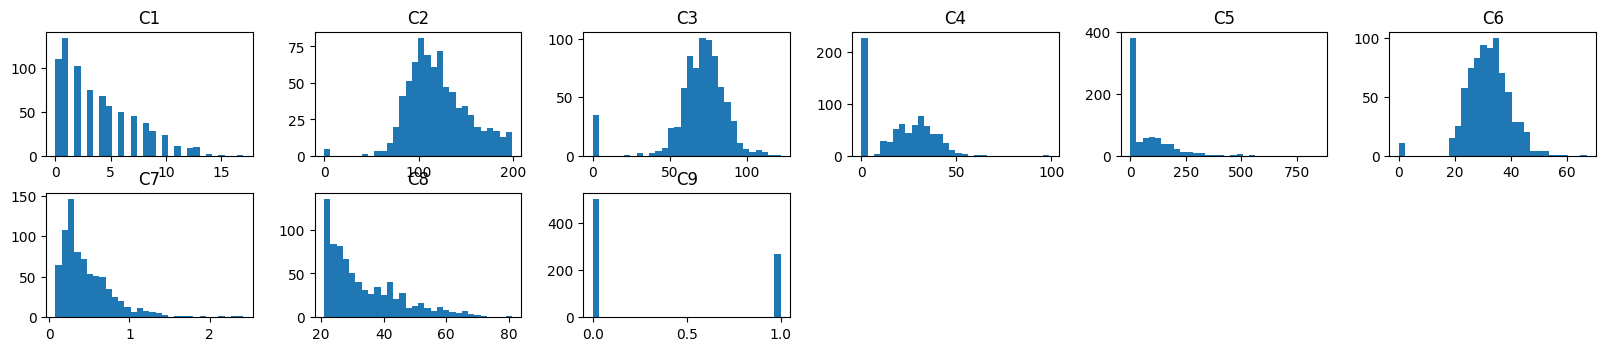

In [12]:
df.hist(figsize=(20,10), grid=False, layout=(5, 6), bins = 30)

In [13]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object_]).columns

In [14]:
categorical_features

Index(['Class'], dtype='object')

In [15]:
skew_values = skew(df[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
4,C5,2.267810
6,C7,1.916159
7,C8,1.127389
0,C1,0.899912
8,C9,0.633776
1,C2,0.173414
3,C4,0.109159
5,C6,-0.428143
2,C3,-1.840005


In [16]:
df['Class'].unique()

array(['tested_positive', 'tested_negative'], dtype=object)

In [17]:
label_encoder= LabelEncoder()

In [18]:
df['Class'] = label_encoder.fit_transform(df['Class'])
df['Class'].unique()

array([1, 0])

<Axes: xlabel='Class', ylabel='count'>

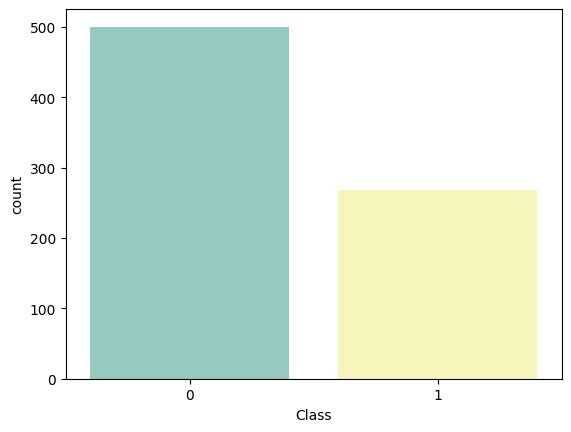

In [19]:
sns.countplot(x = 'Class', data = df, palette="Set3")

In [20]:
corr=df.corr()

<Axes: >

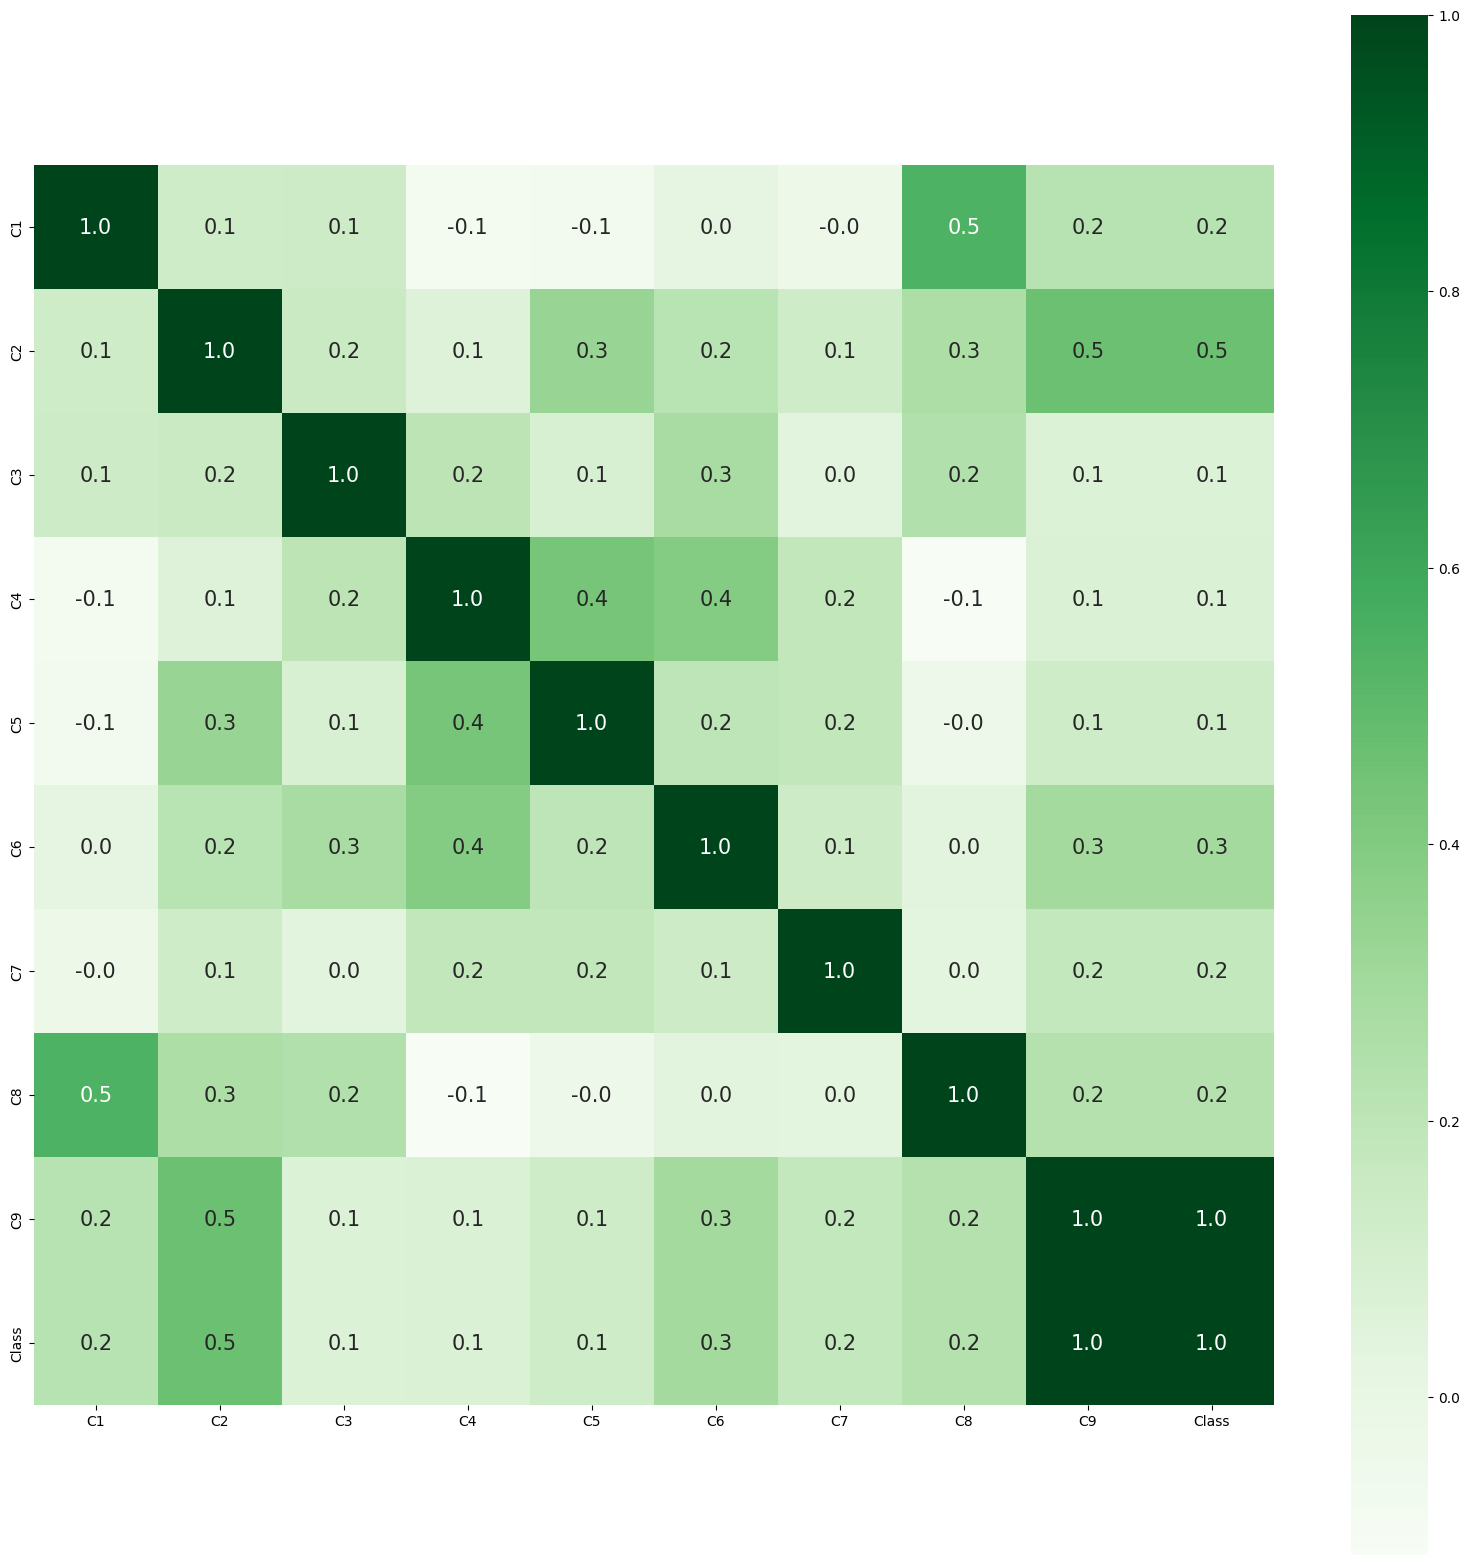

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [22]:
df=df.drop('C9',axis=1)
df.head(10)

,C1,C2,C3,C4,C5,C6,C7,C8,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<Axes: >

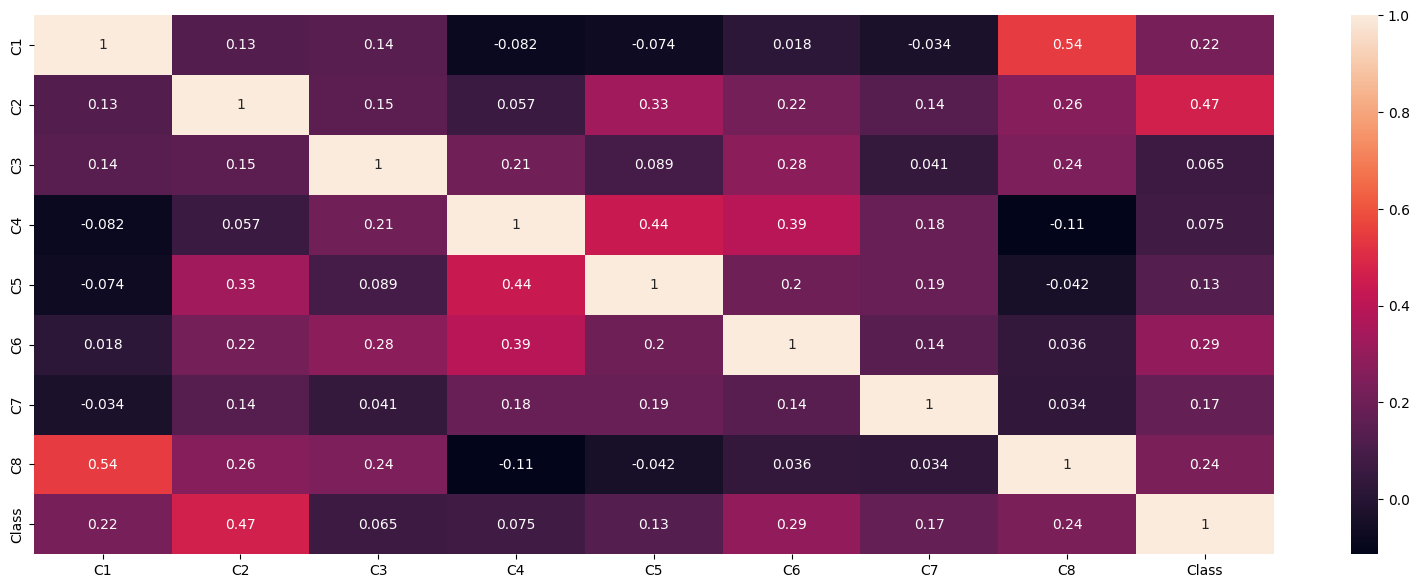

In [23]:
import seaborn as sb

plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

In [24]:
#df.sort_index(axis=1, ascending=False, inplace=True)
#df.head(10)

In [25]:
from scipy.stats import pearsonr,spearmanr
L=[]
for i in df.columns:
    pearsonCor,_=pearsonr(df[i],df['Class'])
    L.append(pearsonCor)
    print(i,' - pearsonCor={}'.format(pearsonCor))

C1  - pearsonCor=0.22189815303398652
C2  - pearsonCor=0.4665813983068734
C3  - pearsonCor=0.06506835955033273
C4  - pearsonCor=0.07475223191831933
C5  - pearsonCor=0.13054795488404775
C6  - pearsonCor=0.29269466264444516
C7  - pearsonCor=0.1738440656529598
C8  - pearsonCor=0.2383559830271976
Class  - pearsonCor=0.9999999999999978


In [26]:
L.sort(reverse=True)
L

[0.9999999999999978,
 0.4665813983068734,
 0.29269466264444516,
 0.2383559830271976,
 0.22189815303398652,
 0.1738440656529598,
 0.13054795488404775,
 0.07475223191831933,
 0.06506835955033273]

<Axes: >

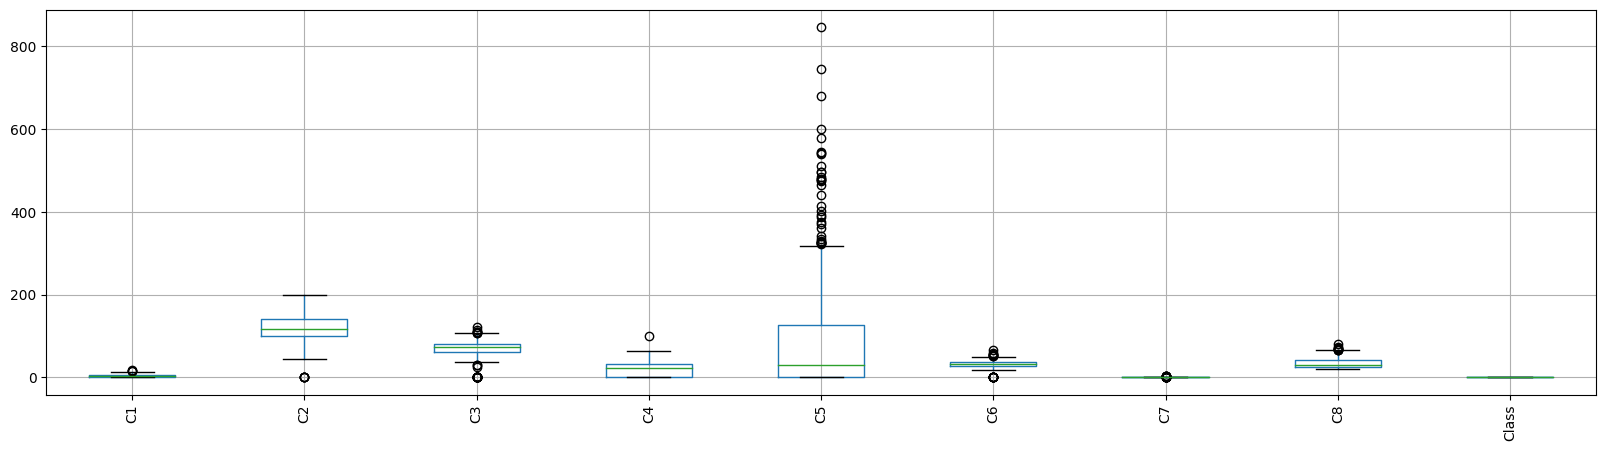

In [27]:
df.boxplot( rot = 90, figsize=(20,5))

In [28]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

C1         5.0000
C2        41.2500
C3        18.0000
C4        32.0000
C5       127.2500
C6         9.3000
C7         0.3825
C8        17.0000
Class      1.0000
dtype: float64

In [29]:
#show outlier data
Upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

        C1     C2     C3     C4     C5     C6     C7     C8  Class
0    False  False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False  False
4    False  False  False  False  False  False   True  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...    ...
763  False  False  False  False  False  False  False  False  False
764  False  False  False  False  False  False  False  False  False
765  False  False  False  False  False  False  False  False  False
766  False  False  False  False  False  False  False  False  False
767  False  False  False  False  False  False  False  False  False

[768 rows x 9 columns]


In [30]:
# remove outlier
#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
from sklearn.preprocessing import scale,StandardScaler,normalize,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

ardata=normalize(df,norm='l2',axis=0)
ardata = StandardScaler().fit(ardata).transform(ardata)
#ardata=MinMaxScaler(feature_range=(0,1)).fit_transform(ardata)
DFdata=pd.DataFrame(ardata,columns=df.columns)
labels = DFdata['Class']
data=DFdata.drop('Class',axis=1)
labels = label_encoder.fit_transform(labels)

In [32]:
from sklearn.linear_model import Lasso

ls=Lasso(alpha=0.1)
ls.fit(data,labels)

z=ls.coef_
z

array([0.        , 0.11949757, 0.        , 0.        , 0.        ,
       0.01309275, 0.        , 0.        ])

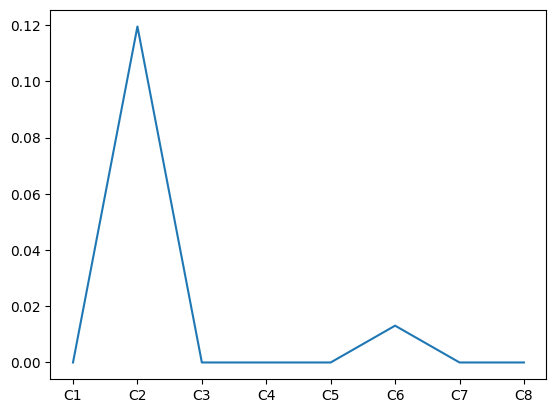

In [33]:
plt.plot(data.columns,z)
plt.show()

In [34]:
data=data[['C1','C3','C4','C5','C7','C8']]

In [35]:
X = data  
y = labels

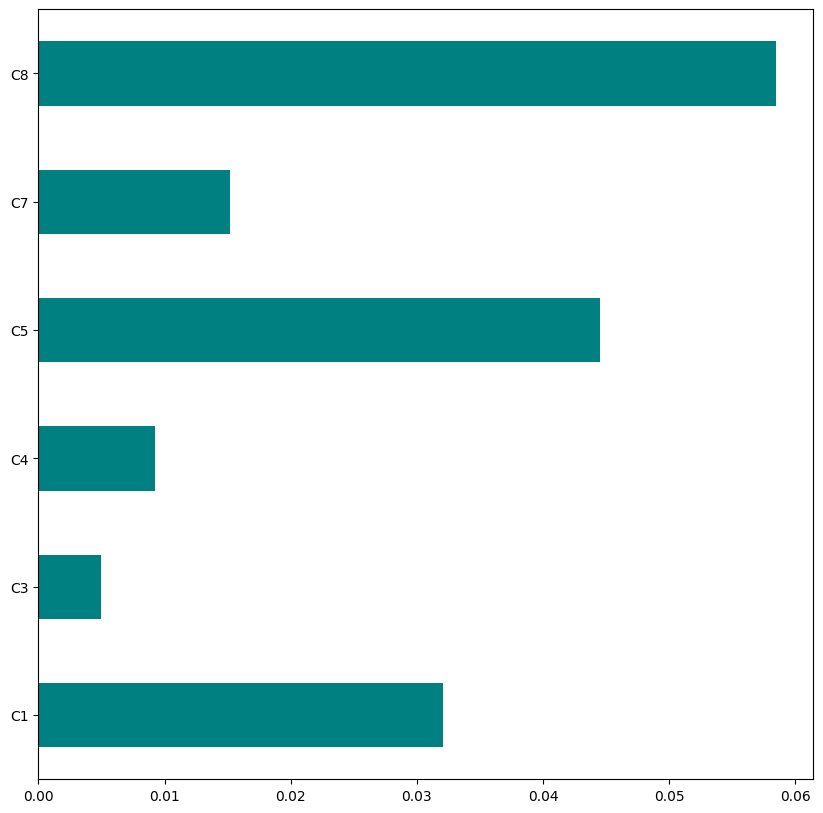

In [36]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X,y)
feat_importances=pd.Series(importance,X.columns[0:len(X.columns)])
plt.figure(figsize=(10,10))
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [37]:
feat_importances

C1    0.032099
C3    0.004955
C4    0.009224
C5    0.044518
C7    0.015227
C8    0.058502
dtype: float64

In [38]:
L=list(feat_importances)
L.sort(reverse=True)
L

[0.0585024332579438,
 0.04451791065424282,
 0.03209919524968807,
 0.015227466010191426,
 0.009223542069135116,
 0.004955078350994846]

In [39]:
data=data[['C8','C5','C1']]

In [40]:
X=data

In [41]:
X

,C8,C5,C1
0,1.425995,-0.692891,0.639947
1,-0.190672,-0.692891,-0.844885
2,-0.105584,-0.692891,1.233880
3,-1.041549,0.123302,-0.844885
4,-0.020496,0.765836,-1.141852
...,...,...,...
763,2.532136,0.870031,1.827813
764,-0.531023,-0.692891,-0.547919
765,-0.275760,0.279594,0.342981
766,1.170732,-0.692891,-0.844885


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 3)
(154, 3)
(614,)
(154,)


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

#from sklearn.linear_model import LogisticRegression
tree=DecisionTreeClassifier()
rfe = RFE(tree,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
tree.fit(X_train_rfe,y_train)
y_predict=tree.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.9511400651465798 
 MAE  =0.048859934853420196 
 confusion_matrix=
[[388   5]
 [ 25 196]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       393
           1       0.98      0.89      0.93       221

    accuracy                           0.95       614
   macro avg       0.96      0.94      0.95       614
weighted avg       0.95      0.95      0.95       614



In [44]:
from sklearn.linear_model import LogisticRegression

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
lr=LogisticRegression(C=0.9, solver='liblinear')
rfe = RFE(lr,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
lr.fit(X_train_rfe,y_train)
y_predict=lr.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.6498371335504886 
 MAE  =0.3501628664495114 
 confusion_matrix=
[[341  52]
 [163  58]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       393
           1       0.53      0.26      0.35       221

    accuracy                           0.65       614
   macro avg       0.60      0.57      0.56       614
weighted avg       0.62      0.65      0.61       614



In [45]:
from sklearn.feature_selection import RFE
from sklearn import svm

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

nb = svm.SVC(kernel='rbf')
nb.fit(X_train, y_train) 

rfe = RFE(nb,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
nb.fit(X_train_rfe,y_train)
y_predict=nb.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.7068403908794788 
 MAE  =0.2931596091205212 
 confusion_matrix=
[[349  44]
 [136  85]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       393
           1       0.66      0.38      0.49       221

    accuracy                           0.71       614
   macro avg       0.69      0.64      0.64       614
weighted avg       0.70      0.71      0.68       614



In [46]:
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

classifier = GaussianNB() 

rfe = RFE(classifier,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
classifier.fit(X_train_rfe,y_train)
y_predict=classifier.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.6482084690553745 
 MAE  =0.3517915309446254 
 confusion_matrix=
[[329  64]
 [152  69]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       393
           1       0.52      0.31      0.39       221

    accuracy                           0.65       614
   macro avg       0.60      0.57      0.57       614
weighted avg       0.62      0.65      0.62       614



In [47]:
from sklearn.feature_selection import RFE
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

nb = svm.SVC(kernel='rbf')
nb.fit(X_train, y_train) 

rfe = RFE(nb,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
nb.fit(X_train_rfe,y_train)
y_predict=nb.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.7068403908794788 
 MAE  =0.2931596091205212 
 confusion_matrix=
[[349  44]
 [136  85]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       393
           1       0.66      0.38      0.49       221

    accuracy                           0.71       614
   macro avg       0.69      0.64      0.64       614
weighted avg       0.70      0.71      0.68       614



In [48]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,100):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    Result=model.score(X_test,y_test)
    print(f"neighbors : {i} , score : {Result}")

neighbors : 1 , score : 0.6688311688311688
neighbors : 2 , score : 0.6883116883116883
neighbors : 3 , score : 0.6623376623376623
neighbors : 4 , score : 0.6948051948051948
neighbors : 5 , score : 0.6493506493506493
neighbors : 6 , score : 0.7077922077922078
neighbors : 7 , score : 0.7012987012987013
neighbors : 8 , score : 0.7012987012987013
neighbors : 9 , score : 0.7077922077922078
neighbors : 10 , score : 0.7077922077922078
neighbors : 11 , score : 0.7077922077922078
neighbors : 12 , score : 0.7012987012987013
neighbors : 13 , score : 0.7012987012987013
neighbors : 14 , score : 0.7207792207792207
neighbors : 15 , score : 0.7337662337662337
neighbors : 16 , score : 0.7272727272727273
neighbors : 17 , score : 0.7142857142857143
neighbors : 18 , score : 0.7077922077922078
neighbors : 19 , score : 0.7207792207792207
neighbors : 20 , score : 0.7337662337662337
neighbors : 21 , score : 0.7272727272727273
neighbors : 22 , score : 0.7272727272727273
neighbors : 23 , score : 0.72727272727272

The accuracy of KNN is:  0.73
[[93 14]
 [28 19]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       107
           1       0.58      0.40      0.48        47

    accuracy                           0.73       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.71      0.73      0.71       154



<Axes: >

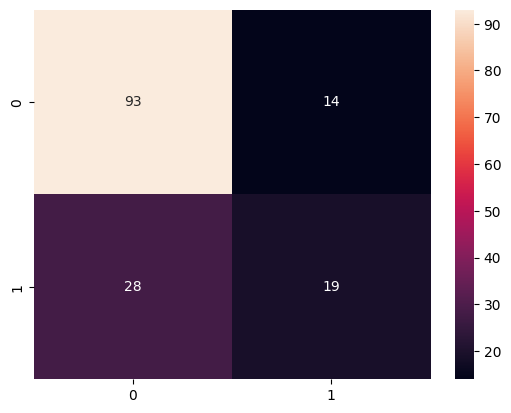

In [49]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
#print('y_predict={} \n y_test  ={}'.format(y_pred,y_test))
ac = accuracy_score(y_test,y_pred)
print('The accuracy of KNN is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
sns.heatmap(cm,annot=True)

In [50]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,20):
    classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state=4)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    ac=metrics.accuracy_score(y_test, y_pred)
    print('The accuracy of Decision Tree Classification is: ', round(ac,2),'i=',i)

The accuracy of Decision Tree Classification is:  0.62 i= 1
The accuracy of Decision Tree Classification is:  0.75 i= 2
The accuracy of Decision Tree Classification is:  0.75 i= 3
The accuracy of Decision Tree Classification is:  0.68 i= 4
The accuracy of Decision Tree Classification is:  0.71 i= 5
The accuracy of Decision Tree Classification is:  0.66 i= 6
The accuracy of Decision Tree Classification is:  0.68 i= 7
The accuracy of Decision Tree Classification is:  0.67 i= 8
The accuracy of Decision Tree Classification is:  0.66 i= 9
The accuracy of Decision Tree Classification is:  0.68 i= 10
The accuracy of Decision Tree Classification is:  0.66 i= 11
The accuracy of Decision Tree Classification is:  0.64 i= 12
The accuracy of Decision Tree Classification is:  0.6 i= 13
The accuracy of Decision Tree Classification is:  0.62 i= 14
The accuracy of Decision Tree Classification is:  0.64 i= 15
The accuracy of Decision Tree Classification is:  0.62 i= 16
The accuracy of Decision Tree Clas

The accuracy of Decision Tree Classification is:  0.75
[[104   3]
 [ 35  12]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       107
           1       0.80      0.26      0.39        47

    accuracy                           0.75       154
   macro avg       0.77      0.61      0.62       154
weighted avg       0.76      0.75      0.71       154



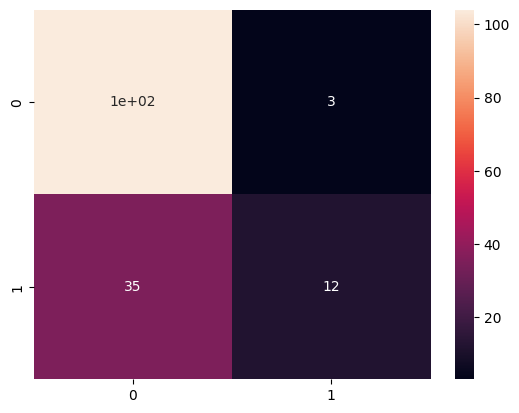

In [51]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Decision Tree Classification is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Logistic Regression is:  0.72
[[98  9]
 [34 13]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       107
           1       0.59      0.28      0.38        47

    accuracy                           0.72       154
   macro avg       0.67      0.60      0.60       154
weighted avg       0.70      0.72      0.68       154



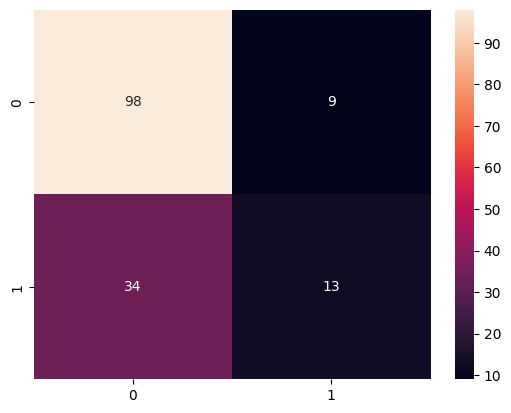

In [52]:
# Classification LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Logistic Regression is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

Accuracy of the SVM Model:  0.71
[[91 16]
 [28 19]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       107
           1       0.54      0.40      0.46        47

    accuracy                           0.71       154
   macro avg       0.65      0.63      0.63       154
weighted avg       0.70      0.71      0.70       154



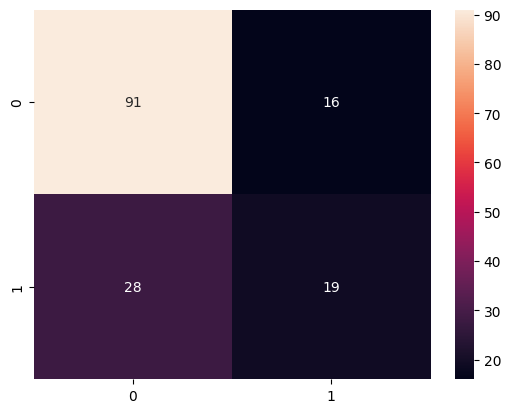

In [53]:
# Classification SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM Model: ",round(accuracy,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Naive bayes is:  0.7272727272727273
[[95 12]
 [30 17]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       107
           1       0.59      0.36      0.45        47

    accuracy                           0.73       154
   macro avg       0.67      0.62      0.63       154
weighted avg       0.71      0.73      0.71       154



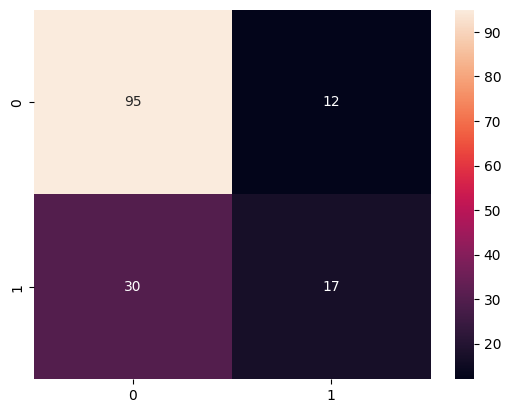

In [54]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('The accuracy of Naive bayes is: ', ac)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))